In [26]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [28]:
df = pd.read_csv('MICRODADOS_ENEM_2023.csv', encoding='latin1', sep=';')

In [55]:
print(df)

         NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0        210059085136    2023               14       M                2   
1        210059527735    2023               12       M                2   
2        210061103945    2023                6       F                1   
3        210060214087    2023                2       F                1   
4        210059980948    2023                3       F                1   
...               ...     ...              ...     ...              ...   
3933950  210061959676    2023               12       M                1   
3933951  210061950911    2023                1       F                1   
3933952  210061965966    2023                3       F                1   
3933953  210061932304    2023                2       M                1   
3933954  210058924455    2023                3       F                1   

         TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                  1   

# Microdados ENEM

## Grupos de variaveis

- Dados do participante
- Dados da escola
- Dadps do local de aplicação da prova
- Dados da redação
- Dados do questionario socioeconomico

In [9]:
# 5 primeiras linha
df.head(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180007186625,2018,2,F,0.0,4,1,2,0,4,1.0,0,1500800.0,Ananindeua,15.0,PA,4.0,1.0,1.0,1500800,Ananindeua,15,PA,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,534.2,611.4,517.9,496.3,BABDABEECDBDCBCAAAEDCEDDEADADEACABEEBABCABADC,CBAEACBBADABADEDDCDABBEAEEBBDDCECBECDABADDEEA,99999BDAECEBACECBBBBEBBDABDAAAADECCCDADBCCBBAA...,CCDAECBEBDAACDACABADECBDAADACBEDDAACBEABABDCD,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,40.0,40.0,120.0,40.0,360.0,E,E,D,D,2,F,A,C,D,A,A,A,B,A,A,B,A,B,C,B,B,D,B,C,B,B,D
1,180007186627,2018,3,F,0.0,4,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1503200,Igarapé-Açu,15,PA,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,506.9,477.8,495.3,440.6,BADEBBDBDECBADCCDCEDAEDBBEDCABEAECABCAEEAEACE,BEDBBDBCCABDADABAEDDBAABCDACBECCEACABAEAAAEAB,CDEBB99999ABADBBBEBDEBBADCDBCBDDCECDDAECAACDAA...,AEECACDEECDBBEEEABBEADDAADCEAEAEDCEBCDABDADEA,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,140.0,40.0,40.0,160.0,40.0,420.0,D,E,A,A,4,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
2,180007186628,2018,3,M,0.0,0,1,2,0,2,1.0,0,3155603.0,Rio Pardo de Minas,31.0,MG,2.0,1.0,1.0,3155603,Rio Pardo de Minas,31,MG,1.0,1.0,1.0,1.0,449.0,453.0,458.0,462.0,470.6,473.8,534.4,410.4,CEEEEDBDACBBDADABCCCBDBBEBCEDEAACBACEEEBEBBEE,ECBDABEADCECAEAEECBCBDEABCDEADCBBCDAECDDBDABC,ECBDB99999CBDDCEABEABDBDEEECCCDDCCCDBDBBAAECBC...,BCAAACEBDCDBACADEABACCBDADADBDBCDCDABBDCBCDCB,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,100.0,120.0,140.0,600.0,B,B,A,A,7,B,A,B,D,B,B,B,A,A,A,A,A,A,B,B,A,D,A,A,A,B,A
3,180007186629,2018,2,F,0.0,3,1,2,0,4,1.0,0,1500800.0,Ananindeua,15.0,PA,4.0,1.0,1.0,1500800,Ananindeua,15,PA,1.0,1.0,1.0,1.0,450.0,452.0,456.0,461.0,588.9,663.3,614.5,711.5,AAEBECBAEAECEBAABADCDBDCDBAEDACBCDCDDCDEEBBEC,ACADBCEBDAACCDAEBEEDBDDDBEECDACAABDAABABEBECC,99999CBBEBDBCEDDCAAEDAEAEABEDCABBBCCDCDDDDCACE...,DABDACDCD*ACCDDBBDADEABBEEADAECABADBDDA*CDAEA,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,160.0,160.0,180.0,180.0,120.0,800.0,F,F,D,D,4,I,A,B,D,A,A,B,A,B,A,A,A,A,C,A,B,D,B,A,B,B,B
4,180007186631,2018,11,F,0.0,5,1,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2610905,Pesqueira,26,PE,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,477.8,621.5,519.4,543.1,ADEEEEEBDCBBBBCAACCCEEEDDACCCDBDAACCACBACECDC,AACCCEEADEEACEBBBEECCCBEBCECDDDAEAEDEEABEDECB,99999CDEDDDDBADDCBEBBBBBBDCDCBBDEEDADEDBDDDEBC...,ACCABCCBBDAEDDCBEEEEEDECECABBDCECCECDDABEADDA,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,120.0,120.0,100

In [11]:
# 5 ultimas linhas
df.tail(n = 10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
5513723,180014002698,2018,7,M,0.0,3,1,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3304557,Rio de Janeiro,33,RJ,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,B,F,3,B,A,B,C,A,A,B,A,A,A,A,A,A,D,B,A,C,A,B,A,A,A
5513724,180014002707,2018,6,F,0.0,2,1,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5208707,Goiânia,52,GO,1.0,1.0,1.0,1.0,448.0,453.0,458.0,460.0,483.8,561.6,535.7,407.5,EABDEDCDBDDCDDDCCCCDDDAAAAABBBDDCCCDDDDDDDDDD,DACCDCDADCEBDADAABCDACADCBEBADEAADDCDCABAEDDD,99999DECBBACDAEEBECBCCEDABACBABABECBCBAEAEACDB...,AAAAAEEEEEECDCDBBEEDDDDEEEEBEEABEEEEDCBEEBBBB,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,40.0,40.0,120.0,60.0,380.0,E,E,F,D,2,C,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A
5513725,180014002709,2018,8,F,0.0,2,1,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,B,4,H,A,C,D,B,A,B,B,B,B,B,A,A,C,A,B,E,B,C,B,A,A
5513726,180014002710,2018,6,M,0.0,3,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3118601,Contagem,31,MG,1.0,1.0,1.0,1.0,450.0,453.0,458.0,461.0,462.7,599.0,420.6,546.6,AAACBCCDEACAADBAECEACEDBABACEDDABCCBABDADCBCC,DCBBDEEABACBEDCAEEBAEDAAAACBECEEADCEBABCDBCBE,ACABB99999ABCBECBAAACEADBADBCEEDCADADAAEEACBAD...,BECECECABBAECDDACBCBCABDABBDCBBCAACDABCDCDDBB,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,120.0,80.0,80.0,100.0,20.0,400.0,B,E,F,F,4,D,A,C,D,B,A,B,B,B,A,B,A,A,B,A,B,D,B,B,B,A,A
5513727,180014002711,2018,14,F,0.0,1,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3304557,Rio de Janeiro,33,RJ,1.0,1.0,1.0,1.0,448.0,451.0,455.0,460.0,474.9,603.3,467.1,497.9,ACBCEAEAABBBCEBBABBCBBEDDCABCBBBBACBBDACAAECC,ABAEBAEAECBEAEAEAEAAAACCEBBBDCEAEBBACDCAAEAEA,99999AECABDAAEBBACAAABECBABADDEDAEABBCAEAABCEB...,DADDEBBCDAAEDABDBEACEDAEACEDCDCBEDCAACADCEDDD,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,140.0,40.0,40.0,60.0,20.0,300.0,H,C,D,B,5,D,A,C,C,A,A,B,A,B,B,B,A,B,D,B,B,E,B,B,B,A,B
5513728,180014002713,2018,11,F,0.0,2,2,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2901007,Amargosa,29,BA,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,489.3,602.3,515.1,431.7,ABAAEEEBECBBBBCCDAEEBDDCDEBDDAAEBDCDDCBEDACDA,AADEDEAAEEAAECDCBDAABAAEDEACABCABBEDAEEABBCCA,99999EBAADABBEBABACCDBCBEBBAEAABBBEADABBEDCEBA...,BBDDEBADCDBDDECCACABEEBDEDABCCEBDDEDECBCCCEBE,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,140.0,40.0,40.0,120.0,20.0,360.0,E,E,B,B,2,B,A,B,D,A,A,B,A,A,A,A,A,A,A,A,A,C,A,B,B,A,A
5513729,180014002715,2018,4,F,0.0,3,1,1,1,1,1.0,0,NaN,NaN,NaN,

In [13]:
df.shape

(5513733, 78)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513733 entries, 0 to 5513732
Data columns (total 78 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         float64
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [17]:
# comando para verificar dados ausentes
df.isna()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513728,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5513729,False,False,False

In [19]:
(df.isna().sum() / df.shape[0] * 100 ).sort_values(ascending = False)

TP_LOCALIZACAO_ESC        73.723501
TP_SIT_FUNC_ESC           73.723501
TP_DEPENDENCIA_ADM_ESC    73.723501
SG_UF_ESC                 73.723501
CO_UF_ESC                 73.723501
                            ...    
Q001                       0.000000
Q002                       0.000000
Q003                       0.000000
Q004                       0.000000
Q027                       0.000000
Length: 78, dtype: float64

In [21]:
# sumario estatistico dos dados
# 25%: primeiro quartil
# 50%: segundo quartil
# 75%: terceiro quartil
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,5513733.0,1.800104e+11,1.917637e+06,1.800072e+11,1.800088e+11,1.800104e+11,1.800120e+11,1.800140e+11
NU_ANO,5513733.0,2.018000e+03,0.000000e+00,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03,2.018000e+03
TP_FAIXA_ETARIA,5513733.0,5.867898e+00,4.037091e+00,1.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00,2.000000e+01
TP_ESTADO_CIVIL,5296097.0,1.197083e-01,3.752607e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
TP_COR_RACA,5513733.0,2.126975e+00,1.017869e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
TP_NACIONALIDADE,5513733.0,1.038819e+00,2.324418e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,5513733.0,1.539053e+00,7.202553e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,5513733.0,3.004950e+00,4.001606e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,1.200000e+01
TP_ESCOLA,5513733.0,1.348236e+00,7.111995e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ENSINO,3483075.0,1.198037e+00,5.931853e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00


In [23]:
df.index

RangeIndex(start=0, stop=5513733, step=1)

In [25]:
# quantidade de valores umicos por coluna
df.nunique().sort_values(ascending = True)

NU_ANO                      1
TP_LOCALIZACAO_ESC          2
Q023                        2
TP_LINGUA                   2
Q021                        2
                       ...   
TX_RESPOSTAS_MT       3901744
TX_RESPOSTAS_CN       3902130
TX_RESPOSTAS_CH       4137237
TX_RESPOSTAS_LC       4143564
NU_INSCRICAO          5513733
Length: 78, dtype: int64

In [27]:
type(df)

pandas.core.frame.DataFrame

In [29]:
# selecionar uma coluna
df.TP_ESCOLA

0          4
1          1
2          2
3          4
4          1
          ..
5513728    1
5513729    1
5513730    1
5513731    1
5513732    1
Name: TP_ESCOLA, Length: 5513733, dtype: int64

In [31]:
df.TP_ESCOLA.value_counts()

TP_ESCOLA
1    4110755
2    1137488
4     251613
3      13877
Name: count, dtype: int64

In [33]:
# selecionar uma coluna
df['TP_ESCOLA']

0          4
1          1
2          2
3          4
4          1
          ..
5513728    1
5513729    1
5513730    1
5513731    1
5513732    1
Name: TP_ESCOLA, Length: 5513733, dtype: int64

In [35]:
# selecionar uma coluna
df.loc[:,'TP_SEXO']

0          F
1          F
2          M
3          F
4          F
          ..
5513728    F
5513729    F
5513730    M
5513731    F
5513732    M
Name: TP_SEXO, Length: 5513733, dtype: object

In [37]:
df.iloc[:, 0 ]

0          180007186625
1          180007186627
2          180007186628
3          180007186629
4          180007186631
               ...     
5513728    180014002713
5513729    180014002715
5513730    180014002716
5513731    180014002721
5513732    180014002722
Name: NU_INSCRICAO, Length: 5513733, dtype: int64

In [39]:
df.TP_ESCOLA.value_counts().sort_index(ascending = True)
# 1 nao responderam
# 2 escola publica
# 3 escola exterior
# 4 escola privada

TP_ESCOLA
1    4110755
2    1137488
3      13877
4     251613
Name: count, dtype: int64

In [41]:
# seleciona uma coluna
# .iloc[ ] : seleciona colunas pelo label
# sintaxe: df.loc[linhas:colunas]
df.loc[:, 'TP_SEXO']
# todas as colunas do inicio até o final da coluna TP_SEXO

0          F
1          F
2          M
3          F
4          F
          ..
5513728    F
5513729    F
5513730    M
5513731    F
5513732    M
Name: TP_SEXO, Length: 5513733, dtype: object

In [43]:
# teve mais mulher do que homem fazendo a prova do enem
df.TP_SEXO.value_counts().sort_index(ascending = True)

TP_SEXO
F    3257698
M    2256035
Name: count, dtype: int64

In [45]:
# seleciona multiplas colunas
df[['TP_SEXO','TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,4
1,F,1
2,M,2
3,F,4
4,F,1
...,...,...
5513728,F,1
5513729,F,1
5513730,M,1
5513731,F,1


In [47]:
df.loc[:,['TP_SEXO','TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,4
1,F,1
2,M,2
3,F,4
4,F,1
...,...,...
5513728,F,1
5513729,F,1
5513730,M,1
5513731,F,1


In [49]:
# .iloc[] : seleciona coluna pelas posições 
df.iloc[:, 3] # TP_SEXO neste caso

0          F
1          F
2          M
3          F
4          F
          ..
5513728    F
5513729    F
5513730    M
5513731    F
5513732    M
Name: TP_SEXO, Length: 5513733, dtype: object

In [51]:
df.iloc[0:10, 22] # posição 0 a 10, coluna 22

0    PA
1    PA
2    MG
3    PA
4    PE
5    MG
6    RJ
7    SC
8    MG
9    RJ
Name: SG_UF_PROVA, dtype: object

In [53]:
# seleciona colunas numericas
df.select_dtypes(include = [int, float]) # inclua para mim só as colunas int e float

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
0,180007186625,2018,2,0.0,4,1,2,0,4,1.0,0,1500800.0,15.0,4.0,1.0,1.0,1500800,15,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,534.2,611.4,517.9,496.3,1,1.0,120.0,40.0,40.0,120.0,40.0,360.0,2
1,180007186627,2018,3,0.0,4,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,1503200,15,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,506.9,477.8,495.3,440.6,0,1.0,140.0,40.0,40.0,160.0,40.0,420.0,4
2,180007186628,2018,3,0.0,0,1,2,0,2,1.0,0,3155603.0,31.0,2.0,1.0,1.0,3155603,31,1.0,1.0,1.0,1.0,449.0,453.0,458.0,462.0,470.6,473.8,534.4,410.4,0,1.0,120.0,120.0,100.0,120.0,140.0,600.0,7
3,180007186629,2018,2,0.0,3,1,2,0,4,1.0,0,1500800.0,15.0,4.0,1.0,1.0,1500800,15,1.0,1.0,1.0,1.0,450.0,452.0,456.0,461.0,588.9,663.3,614.5,711.5,1,1.0,160.0,160.0,180.0,180.0,120.0,800.0,4
4,180007186631,2018,11,0.0,5,1,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,2610905,26,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,477.8,621.5,519.4,543.1,1,1.0,120.0,120.0,120.0,100.0,40.0,500.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513728,180014002713,2018,11,0.0,2,2,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,2901007,29,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,489.3,602.3,515.1,431.7,1,1.0,140.0,40.0,40.0,120.0,20.0,360.0,2
5513729,180014002715,2018,4,0.0,3,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,1502400,15,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5513730,180014002716,2018,5,0.0,0,1,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,3518800,35,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,425.8,496.9,393.3,564.6,1,1.0,100.0,100.0,80.0,100.0,40.0,420.0,5
5513731,180014002721,2018,5,0.0,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,3205002,32,1.0,1.0,1.0,1.0,447.0,452.0,456.0,459.0,462.8,561.9,521.5,521.5,1,1.0,140.0,160.0,140.0,120.0,160.0,720.0,3


In [55]:
# seleciona colunas numericas exemplo 2
df.select_dtypes(include = [object])

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,F,Ananindeua,PA,Ananindeua,PA,BABDABEECDBDCBCAAAEDCEDDEADADEACABEEBABCABADC,CBAEACBBADABADEDDCDABBEAEEBBDDCECBECDABADDEEA,99999BDAECEBACECBBBBEBBDABDAAAADECCCDADBCCBBAA...,CCDAECBEBDAACDACABADECBDAADACBEDDAACBEABABDCD,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,E,E,D,D,F,A,C,D,A,A,A,B,A,A,B,A,B,C,B,B,D,B,C,B,B,D
1,F,NaN,NaN,Igarapé-Açu,PA,BADEBBDBDECBADCCDCEDAEDBBEDCABEAECABCAEEAEACE,BEDBBDBCCABDADABAEDDBAABCDACBECCEACABAEAAAEAB,CDEBB99999ABADBBBEBDEBBADCDBCBDDCECDDAECAACDAA...,AEECACDEECDBBEEEABBEADDAADCEAEAEDCEBCDABDADEA,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,D,E,A,A,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
2,M,Rio Pardo de Minas,MG,Rio Pardo de Minas,MG,CEEEEDBDACBBDADABCCCBDBBEBCEDEAACBACEEEBEBBEE,ECBDABEADCECAEAEECBCBDEABCDEADCBBCDAECDDBDABC,ECBDB99999CBDDCEABEABDBDEEECCCDDCCCDBDBBAAECBC...,BCAAACEBDCDBACADEABACCBDADADBDBCDCDABBDCBCDCB,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,B,B,A,A,B,A,B,D,B,B,B,A,A,A,A,A,A,B,B,A,D,A,A,A,B,A
3,F,Ananindeua,PA,Ananindeua,PA,AAEBECBAEAECEBAABADCDBDCDBAEDACBCDCDDCDEEBBEC,ACADBCEBDAACCDAEBEEDBDDDBEECDACAABDAABABEBECC,99999CBBEBDBCEDDCAAEDAEAEABEDCABBBCCDCDDDDCACE...,DABDACDCD*ACCDDBBDADEABBEEADAECABADBDDA*CDAEA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,F,F,D,D,I,A,B,D,A,A,B,A,B,A,A,A,A,C,A,B,D,B,A,B,B,B
4,F,NaN,NaN,Pesqueira,PE,ADEEEEEBDCBBBBCAACCCEEEDDACCCDBDAACCACBACECDC,AACCCEEADEEACEBBBEECCCBEBCECDDDAEAEDEEABEDECB,99999CDEDDDDBADDCBEBBBBBBDCDCBBDEEDADEDBDDDEBC...,ACCABCCBBDAEDDCBEEEEEDECECABBDCECCECDDABEADDA,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,A,E,A,A,C,A,B,C,A,B,B,A,A,A,A,A,A,B,B,A,C,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513728,F,NaN,NaN,Amargosa,BA,ABAAEEEBECBBBBCCDAEEBDDCDEBDDAAEBDCDDCBEDACDA,AADEDEAAEEAAECDCBDAABAAEDEACABCABBEDAEEABBCCA,99999EBAADABBEBABACCDBCBEBBAEAABBBEADABBEDCEBA...,BBDDEBADCDBDDECCACABEEBDEDABCCEBDDEDECBCCCEBE,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,E,E,B,B,B,A,B,D,A,A,B,A,A,A,A,A,A,A,A,A,C,A,B,B,A,A
5513729,F,NaN,NaN,Castanhal,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,E,A,B,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
5513730,M,NaN,NaN,Guarulhos,SP,ECDEADBBDEEAAABEDEACAECECDCCCEAADABCADBDCEDBC,ACACEAACACADCBBEBEDACDADEACADBBDCACAEBBAACEBB,99999DDDEEAEEECABCEDDBBEDADCAADAEECAAEBCDABBBB...,ADCBDDBADBEBBCEAACABDABEEABEBABDAACBCACCDEDCD,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,E,F,D,B,G,A,C,C,B,A,B,A,A,A,A,A,B,B,A,A,D,B,A,B,A,A
5513731,F,NaN,NaN,Serra,ES,ECCBBBDCAEDABBECCCBBADCEDDCDBCAACAABBADDBADBC,BEACDCAAAABEECEADEECEDADDCBADECCEDAAAEBABEBCC,99999CBBDBBEACDCABCCABECEBCADCAEABCBCEDDADEDCE...,DCCABCBDEECBDB

In [56]:
# selecione colunas (exceto)
df.select_dtypes(exclude = [object])

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
0,180007186625,2018,2,0.0,4,1,2,0,4,1.0,0,1500800.0,15.0,4.0,1.0,1.0,1500800,15,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,534.2,611.4,517.9,496.3,1,1.0,120.0,40.0,40.0,120.0,40.0,360.0,2
1,180007186627,2018,3,0.0,4,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,1503200,15,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,506.9,477.8,495.3,440.6,0,1.0,140.0,40.0,40.0,160.0,40.0,420.0,4
2,180007186628,2018,3,0.0,0,1,2,0,2,1.0,0,3155603.0,31.0,2.0,1.0,1.0,3155603,31,1.0,1.0,1.0,1.0,449.0,453.0,458.0,462.0,470.6,473.8,534.4,410.4,0,1.0,120.0,120.0,100.0,120.0,140.0,600.0,7
3,180007186629,2018,2,0.0,3,1,2,0,4,1.0,0,1500800.0,15.0,4.0,1.0,1.0,1500800,15,1.0,1.0,1.0,1.0,450.0,452.0,456.0,461.0,588.9,663.3,614.5,711.5,1,1.0,160.0,160.0,180.0,180.0,120.0,800.0,4
4,180007186631,2018,11,0.0,5,1,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,2610905,26,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,477.8,621.5,519.4,543.1,1,1.0,120.0,120.0,120.0,100.0,40.0,500.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513728,180014002713,2018,11,0.0,2,2,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,2901007,29,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,489.3,602.3,515.1,431.7,1,1.0,140.0,40.0,40.0,120.0,20.0,360.0,2
5513729,180014002715,2018,4,0.0,3,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,1502400,15,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5513730,180014002716,2018,5,0.0,0,1,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,3518800,35,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,425.8,496.9,393.3,564.6,1,1.0,100.0,100.0,80.0,100.0,40.0,420.0,5
5513731,180014002721,2018,5,0.0,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,3205002,32,1.0,1.0,1.0,1.0,447.0,452.0,456.0,459.0,462.8,561.9,521.5,521.5,1,1.0,140.0,160.0,140.0,120.0,160.0,720.0,3


# seleciona apenas colunas pelo tipo especificado e lista com uma função tolist
cat_cols = df.select_dtypes(include = object).columns.tolist()

In [58]:
num_cols = df.select_dtypes(include = [int, float]).columns.tolist()

In [62]:
num_cols

['NU_INSCRICAO',
 'NU_ANO',
 'TP_FAIXA_ETARIA',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q005']

# Filtros
### Existe diferença na nota de matematicaa entre alunos de escola pública e privada?

## <span style="color:red;">médias</span>

In [66]:
# media de pontos alunos de colegio 'nao responderam'
df.query('TP_ESCOLA == 1').NU_NOTA_MT.mean()

536.1325562761523

In [68]:
# media de pontos alunos de colegio publico
df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()

509.6268009011179

In [70]:
# media de pontos alunos de colegio exterior
df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()

529.5863436573649

In [72]:
# media de pontos alunos de colegio privado
df.query('TP_ESCOLA == 4').NU_NOTA_MT.mean()

618.3425833883023

## <span style="color:red;">médias + medianas</span>

In [75]:
# media e mediana de pontos alunos de colegio 'nao responderam'
df.query('TP_ESCOLA == 1').NU_NOTA_MT.agg(['mean', 'median'])

mean      536.132556
median    517.400000
Name: NU_NOTA_MT, dtype: float64

In [77]:
# media e mediana de pontos alunos de colegio público
df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg(['mean', 'median'])

mean      509.626801
median    497.300000
Name: NU_NOTA_MT, dtype: float64

In [79]:
# media e mediana de pontos alunos de colegio no exterior
df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg(['mean', 'median'])

mean      529.586344
median    516.600000
Name: NU_NOTA_MT, dtype: float64

In [81]:
# media e mediana de pontos alunos de colegio privado
df.query('TP_ESCOLA == 4').NU_NOTA_MT.agg(['mean', 'median'])

mean      618.342583
median    626.400000
Name: NU_NOTA_MT, dtype: float64

## por sexo

In [84]:
df.query('TP_SEXO == "M"')['TP_SEXO'].unique()

array(['M'], dtype=object)

In [86]:
df.query('(TP_SEXO == "M") & (IN_TREINEIRO == 1)')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
102,180007186739,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3302403,Macaé,33,RJ,1.0,1.0,1.0,1.0,450.0,452.0,456.0,461.0,712.1,690.6,644.9,818.4,ACBDEAECEAECAADAEBCCCEDEDDCDDEBCCDAACACEBDECD,EAECDECBCEACCCDEBEEDBDAEBCEADABAEBEDAEABEBECC,BBBDC99999BDEADECACEDCECDABBCCCBBACBBCABDDCDDE...,EBEDEECECDAECDDCBEADDBBCBCABAEDAAACCADAACDCEC,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,160.0,200.0,180.0,200.0,160.0,900.0,F,F,D,D,6,H,B,C,C,B,B,C,B,B,A,B,A,A,C,A,A,C,B,B,B,C,D
145,180007186785,2018,2,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4323002,Viamão,43,RS,1.0,1.0,1.0,1.0,449.0,452.0,456.0,462.0,407.8,520.9,470.1,568.2,ADDBCBBACCDADBCEDEDBABBDCCCEDBBABEACCEDBDCDCA,CCAECCEADABCDEBDACECEECEACBCADACABDDDDCEECACD,99999CBEBBADBCDBCBAAECBCBBDADBBDBBCCEDAEAEBBAC...,ACECEDADBEEAEACDAABBDEADEBEBEAECDEBDECBDCCADC,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,140.0,120.0,120.0,120.0,80.0,580.0,E,E,B,B,3,D,A,B,C,B,A,B,B,B,A,B,A,A,B,B,A,D,A,A,B,C,A
166,180007186808,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200401,Rio Branco,12,AC,1.0,1.0,1.0,1.0,447.0,451.0,455.0,459.0,509.9,531.2,531.1,670.6,CBBABACADCABBDEBCDDCBDACDADBBEBCBDACBDABBCCAE,ADADBEACDCCBBDAADCECBECDBBCDDACACBBDADBEDBBAC,ABDCC99999DECCBDDCADDEBDBDBCACCDAABDACBCACBCEE...,DACBEDDABDADACDBDCCCADDADBBBDEBDBDCECDCBADBDA,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,80.0,100.0,100.0,0.0,400.0,E,G,C,E,2,N,D,C,C,B,A,B,B,C,A,B,A,B,B,B,B,C,A,C,B,C,D
236,180007186884,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3549904,São José dos Campos,35,SP,1.0,1.0,1.0,1.0,447.0,453.0,458.0,459.0,399.5,623.2,633.7,409.5,ABCDEABCCDEDCCBABABCDCBCBCDCBCCDECBADBDBDBDBD,ECCAABBDDBADBEAABECEACAEEAABEDDECBDBABBDBACED,BCDEB99999ECDCDCBEACCBADBBDEDEBDBBEBBDADADADAC...,DADCBCEBCBACEDAABCCCCCCCCCCCCCCCCCCCCCCCCCCCC,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,140.0,40.0,540.0,E,G,E,E,3,L,A,E,D,B,A,B,B,B,B,B,A,B,B,B,B,D,B,C,B,C,D
310,180007186971,2018,2,M,0.0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2303204,Caririaçu,23,CE,1.0,1.0,1.0,1.0,448.0,453.0,458.0,460.0,436.3,640.9,572.9,485.0,BEDDBBEBDADBAECBCBDCAEEDACECECCEADAEDCBCEDBDE,ECBCDEBEAAECADAAEECACEBEEEAEACEEBDDCAEBBAEACE,99999DCADBDCBCBCAADCABBBAEECACBACBCDBDABDEEDAC...,ADCCBEACACCBDAEACEDCEDCBCEAABCEAEDCDCDBDEBDCD,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,140.0,180.0,160.0,160.0,140.0,780.0,B,A,F,F,3,B,A,B,B,A,A,B,A,A,A,A

In [88]:
df.query("(TP_SEXO == 'M') | (IN_TREINEIRO == 1)").sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
2789021,180010417742,2018,10,M,0.0,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3121605,Diamantina,31,MG,1.0,1.0,1.0,1.0,448.0,451.0,455.0,460.0,598.2,656.2,606.4,662.6,DCACEEEAEDACBCEBBBBEEEEDBABCBCCBCACDDDDBEECBE,CAADCBDAEBBEEEEEBEEACEAABEAEDAEBEDDBAACAABCDA,99999DBCDDCDABAEBBADABDDEDBEABACADEDBCBCBCADBE...,ADEEDACCEDADDCDDAEABEBDCCCABCCDDDECCCCDCBCCCC,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,100.0,120.0,100.0,120.0,100.0,540.0,C,C,C,F,1,B,A,C,D,A,A,B,A,A,A,B,A,A,B,A,A,B,A,A,B,A,C
4664199,180012715750,2018,3,M,0.0,3,1,2,0,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3131703,Itabira,31,MG,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,C,D,5,G,A,C,D,C,A,B,B,B,A,A,A,A,D,B,B,B,B,B,B,B,A
1789954,180009235683,2018,2,M,0.0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1.0,1.0,1.0,1.0,450.0,451.0,455.0,461.0,451.4,428.4,497.7,545.1,BBACDAADDDBBACDCCDBBCCDEBAADDBDBBCDCABDDBCAAB,AEDCCBACCBCAADBACEBDADABDADCDCCAEDDAAABBADCBB,99999BCAADDBCDABBCACDACCBABBADCCACABBCACEBACAB...,ABECBECCECBDCBACDABADCACCDBADEABCABDDAAABDDBB,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,80.0,120.0,100.0,120.0,100.0,520.0,E,G,D,D,3,G,A,C,D,A,A,B,B,B,A,A,A,A,C,A,B,D,B,A,B,C,D
2373314,180009920454,2018,12,M,1.0,3,1,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3129806,Ibirité,31,MG,1.0,1.0,1.0,1.0,450.0,451.0,455.0,461.0,554.2,606.7,580.4,630.1,ECBEADAEACABDBACBCDBCACEDBAEBDBBADDBCADEECAED,EDCEDDECDBBACEEACADBAEBCAEDEDDEAEECEACCAEBECE,99999ABEDBBACCDBDBEDEADDEADCDBACACEDCECDBABEAE...,BEBEEDCECBBACADCBCABDDBCACDBBEADAABBAACDDEACE,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,140.0,120.0,100.0,120.0,80.0,560.0,E,B,C,A,4,E,A,B,C,A,B,B,A,A,A,B,A,A,B,B,A,C,A,B,B,A,A
5203737,180013478367,2018,13,M,0.0,1,1,1,8,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5208707,Goiânia,52,GO,1.0,1.0,1.0,1.0,448.0,453.0,458.0,460.0,422.6,471.1,427.6,406.8,DACBECCBCACBBCEEEDCEBCABCBEDBCADACEDADB.CAAEE,AEBCCECBDBCACEAABC.BCAE.ACBECBEACBADBCADBCBEB,99999DDEBABCDBEEABDADCECACDEDBECEACCDCBBAEBCDA...,EBCEBCADBCDADBDECCCEABCAEAEDADACEACCDBACCCAEA,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,100.0,40.0,40.0,80.0,20.0,280.0,A,C,F,A,6,B,A,A,B,B,A,A,A,A,A,A,A,A,B,A,A,B,A,A,B,A,A


In [90]:
# criando mascara booleana
df.TP_SEXO == 'M'

0          False
1          False
2           True
3          False
4          False
           ...  
5513728    False
5513729    False
5513730     True
5513731    False
5513732     True
Name: TP_SEXO, Length: 5513733, dtype: bool

In [100]:
mask = df.TP_SEXO =='M'

In [102]:
# criei a variavel e usei-a chamando o "df"
df[mask]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
2,180007186628,2018,3,M,0.0,0,1,2,0,2,1.0,0,3155603.0,Rio Pardo de Minas,31.0,MG,2.0,1.0,1.0,3155603,Rio Pardo de Minas,31,MG,1.0,1.0,1.0,1.0,449.0,453.0,458.0,462.0,470.6,473.8,534.4,410.4,CEEEEDBDACBBDADABCCCBDBBEBCEDEAACBACEEEBEBBEE,ECBDABEADCECAEAEECBCBDEABCDEADCBBCDAECDDBDABC,ECBDB99999CBDDCEABEABDBDEEECCCDDCCCDBDBBAAECBC...,BCAAACEBDCDBACADEABACCBDADADBDBCDCDABBDCBCDCB,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,100.0,120.0,140.0,600.0,B,B,A,A,7,B,A,B,D,B,B,B,A,A,A,A,A,A,B,B,A,D,A,A,A,B,A
9,180007186636,2018,12,M,0.0,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3304557,Rio de Janeiro,33,RJ,1.0,1.0,1.0,1.0,447.0,452.0,456.0,459.0,494.8,539.6,527.3,601.4,EDDDDECBECAABCCBBDACABADECEECAAABEABBADEEBBEE,EAACDEBBEBDEDACADECCCAEEDCDCACDCBBDBDDBAACBCA,99999CCEDDDBCE*ACAEEDACBDBCACBCCBADADECBCDCDAE...,ACEDDBACBEEDDAEABBDCBAB*ADEBDCBBBACDBEBCBDCBA,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,120.0,100.0,580.0,F,E,D,B,4,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,C,B,B,B,A,B
10,180007186637,2018,3,M,0.0,1,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2307601,Limoeiro do Norte,23,CE,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,B,C,B,6,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,A,A
19,180007186648,2018,3,M,0.0,3,1,2,0,2,1.0,0,3304557.0,Rio de Janeiro,33.0,RJ,2.0,1.0,1.0,3304557,Rio de Janeiro,33,RJ,1.0,1.0,1.0,1.0,448.0,454.0,457.0,460.0,562.5,580.4,530.5,383.4,ECBAEECCDABCDECEADDDBBEDACECEAADAECECBBADEACD,EDBEACBBDBCEACCDAEEDBAAECBDBEEEBEDEACCCDAEDEB,99999EBBCBECBDBADEEAEBBDDED*DBDACCBEECBDACEDEE...,ACEBDBCAEBDACEBBDAECBDBCAECDBAADBCEACEACBDACE,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,E,B,B,3,F,A,B,B,A,A,B,B,B,B,A,A,A,B,A,B,E,A,A,A,B,A
27,180007186656,2018,11,M,0.0,1,1,1,9,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,567.9,655.7,599.3,467.8,EEBAADBBCCEDDCDAADBADCBBBCADDBACDBACBEDAACBCE,AAEBABBADAEABEEDBEBABBEBAEEBEEAAECBCCDAABADCD,99999BBDCDBCBDEABABCEAECABEADDBECCBDDABBECBCAB...,BDEBEEEABDEABEBCADBCECABBBEAEABDDCBCACAEBEBAD,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,120.0,120.0,40.0,520.0,C,C,C,B,5,I,A,C,C,B,A,B,A,A,A,A,A,A,C,B,B,D,B,C,B,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [104]:
df.loc[df.TP_SEXO == "M"].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
1815048,180009264267,2018,2,M,NaN,1,1,2,0,4,1.0,0,3303203.0,Nilópolis,33.0,RJ,4.0,1.0,1.0,3303203,Nilópolis,33,RJ,1.0,1.0,1.0,1.0,447.0,451.0,455.0,459.0,593.6,670.8,626.0,672.4,AADBDAEDCEDBBBDDDEAECAEBDDDBCEBAEAABADEEBAAEC,EACDDBDAEBCEBEEEBCEACEAABABEEDEAEABDDDAAABCAC,BBDEC99999ABCBDBDBBBACDDBABABDACAECDCECCBCCEAE...,BEDEDCEBBCAACDDADBDEDEDAEDDDCDBABCADEBDCBDABC,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,160.0,120.0,160.0,140.0,140.0,720.0,E,E,B,B,4,H,A,B,C,B,A,B,B,B,B,B,A,A,C,A,A,C,A,B,B,B,D
3420972,180011166583,2018,2,M,NaN,0,1,2,0,2,1.0,0,2305233.0,Horizonte,23.0,CE,2.0,1.0,1.0,2305233,Horizonte,23,CE,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,C,B,4,D,A,B,C,A,A,B,A,A,A,C,A,A,B,B,A,B,A,A,A,B,A
2249606,180009772835,2018,6,M,0.0,3,1,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3106200,Belo Horizonte,31,MG,1.0,1.0,1.0,1.0,449.0,451.0,455.0,462.0,521.1,643.4,584.3,601.5,DEBABDABCCDBCDDACCECDCBCBBAECDCCDEAAEABDDDACE,EACBDAAAEBCEBEEABEEAAEAADBDADAEAEEBABCCAABCDA,BBEDC99999CDCBABEBADDADDBDBDDDEBEEEDACCCBEECBB...,CDDBEAEEBDDACDBDACBAECEDACBDCACCBCCBADEADCEDB,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,120.0,120.0,120.0,600.0,C,E,C,D,5,E,A,C,C,B,A,B,A,B,A,B,A,A,C,B,B,E,B,B,B,A,A
3292636,180011014945,2018,3,M,0.0,1,1,2,0,2,1.0,0,3509502.0,Campinas,35.0,SP,2.0,1.0,1.0,3509502,Campinas,35,SP,1.0,1.0,1.0,1.0,450.0,451.0,455.0,461.0,638.2,634.6,607.6,674.1,BAECAABEEDEBAEDCBADACADDDABABCBCCAEDCADEADEEB,EACDCBAACCCEADEEBEEACEDABBBEDAEACBAEECACCADCA,BBDEC99999CEBBABABADAACDEABDCDECEEADBCCCBAEEAA...,DDBBEECBDDBECBDCBDDDEECCAAACDEBCBACBABEABBCEC,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,120.0,120.0,120.0,120.0,60.0,540.0,C,E,C,D,3,I,A,B,C,C,A,B,B,B,A,B,A,B,C,B,A,E,A,B,B,B,B
1266873,180008637072,2018,3,M,0.0,1,1,2,0,4,1.0,0,3301702.0,Duque de Caxias,33.0,RJ,4.0,1.0,1.0,3301702,Duque de Caxias,33,RJ,1.0,1.0,1.0,1.0,450.0,454.0,457.0,461.0,401.4,584.1,524.5,512.1,BEAEDCACDBCEBCCCDEBEACCDDBEEBCCABCDBCBACDBEDA,DEADACBAAACEBCEDABAAEEAEEEADCDACECABEBBBCEBEA,99999BADCCDCBDEDBABDEBBADBACDEBDCBEABCDBACDBCB...,ACEDBBACCACACEDBDBAEECBCABAAAABBAACDCCADDDBAB,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,120.0,40.0,40.0,120.0,40.0,360.0,H,H,D,F,5,F,A,B,C,C,A,B,B,B,A,A,A,B,B,B,A,E,A,D,B,B,D


In [106]:
df[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
4892026,180013031327,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3522703,Itápolis,35,SP,1.0,1.0,1.0,1.0,449.0,452.0,456.0,462.0,462.1,634.2,566.3,657.8,EEDDABAACBBCBADEADBCDDBEEBACBABAAAABCAABBAAAC,CEECDEBBABAABEBEBEACCCEABAEABDCAABEDEEAECBACC,BBBEC99999ADBABDCBBCDCCBBABACCCABEDABEABDDCBCB...,ECDBEEDAADDAEEAEADACCBABDCBCAEEDDEBBAADAEADCA,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,140.0,120.0,140.0,120.0,100.0,620.0,E,E,D,B,4,E,A,B,C,D,A,B,C,B,A,B,A,B,D,A,A,D,A,B,B,C,A
2874287,180010519161,2018,2,M,0.0,0,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1302603,Manaus,13,AM,1.0,1.0,1.0,1.0,448.0,454.0,457.0,460.0,404.7,643.5,597.2,570.6,BAABAAEBDDCBAACBCCBECDCDDADDDCABBAABABDAAAAAE,EEACABBBADABAEEDCEBDEDEEEEEBEEEDBBEBCDBEBAACA,CBCDB99999CCADEABEABCABEABDABDACCCBAACBBACBDBB...,DDADBEDEADADDBECDDEEEDCDCCABDBCCACACDEDCEAADA,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,100.0,120.0,100.0,100.0,540.0,E,E,F,F,3,H,A,C,C,A,A,C,B,B,A,B,A,A,D,A,B,C,B,B,B,C,C
29628,180007220541,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3136702,Juiz de Fora,31,MG,1.0,1.0,1.0,1.0,447.0,452.0,456.0,459.0,548.8,659.2,613.0,516.4,ECADBDCACECCBCBDABBDEDDDBEDACDAEAEEBCEEBAEDAE,ACCCAECBDDADDCDEBCEDBAAEBCEAEECAEBEDAEADEBEBC,BBEDC99999EDCADECACEDACBBCBADCABBBBBDEDBDCBAAE...,CDDBBCEBEDCDDAEBCCDCBCEACCCECBEBCDCDDCCDBBDDC,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,160.0,180.0,160.0,120.0,140.0,760.0,F,F,D,D,3,I,A,C,D,C,A,C,C,B,B,B,B,B,E,B,B,D,B,C,B,C,D
5444892,180013866235,2018,2,M,0.0,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2302206,Beberibe,23,CE,1.0,1.0,1.0,1.0,447.0,453.0,458.0,459.0,518.2,546.5,506.1,613.3,CDCABBCDAADABBECDDDACCEDDBDBAADECEDBEEBBBBBAE,DCBDAEBEDDBDBAECACECACBABCEDEEAAAEAEDCACADBCC,ACDCD99999BAEEECEEECBBEDAABBECBECADBBBCEABACEA...,BDCCCEAEBDDDBCDABDDECBAAADEBCBCBDBCADABEBBAAC,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,120.0,40.0,520.0,A,D,A,B,2,B,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,C,A,B,B,C,B
5144286,180013391803,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2408102,Natal,24,RN,1.0,1.0,1.0,1.0,447.0,451.0,455.0,459.0,541.4,660.9,594.9,553.4,ACDBBBAEEAEADEEDACDAEBAEDEDECAEEADDDCDCEBABDE,CECDCBDAECCAECEABCEAEEDADEEEDAEECCBBBACAEBAAE,99999BACBBCDEBCDDBACACDCBABBEDDCBCBDACBCBCDEAA...,BCEEEBEEBAADBAEECEBEDEEEEACEEEEEEEE*EEEEEEEEE,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,140.0,120.0,120.0,120.0,40.0,540.0,E,E,C,F,6,G,A,B,D,B,

In [108]:
df.loc[(df.TP_SEXO == "M") & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
3125375,180010816563,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3106200,Belo Horizonte,31,MG,1.0,1.0,1.0,1.0,448.0,451.0,455.0,460.0,449.6,640.0,559.4,618.6,AAADACEEADBBBAAEADDCEDADEACCECEACABACAEBBADEE,ADCDDCDACDBEDAEEACEBAEDAECBEDAEDECCAABCAABAED,BBAAB99999ADCBDAABECEADDEBEAEEECAEEDACCCEAAEAD...,BDBDDEBACBADDEDCBBCBADECCEDDECBDCCADBAAEBEDDE,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,140.0,120.0,140.0,100.0,80.0,580.0,F,D,F,D,5,B,A,B,C,B,A,B,A,B,A,A,A,A,C,B,A,C,A,B,B,C,A
4169291,180012077013,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3151503,Piumhi,31,MG,1.0,1.0,1.0,1.0,448.0,453.0,458.0,460.0,489.9,408.6,438.6,499.0,DADEEAAAABBCABCCABDCABCEDCCACAABABCECACBCAADA,ACAAADCBBBBCDAAAACBCBCBCAABBBADCBBCBBBCAAAAAC,99999.....EBCAAAAEAABBBBADBDDDDDDBEAAADDBAAABB...,CBBBAABCCCACDEACACDDEDBBBBDDDDCCACDBEDADDADBA,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,100.0,40.0,40.0,100.0,20.0,300.0,D,E,A,B,3,B,A,C,D,B,B,B,A,B,A,B,A,A,B,A,A,C,A,A,B,C,A
1490565,180008893680,2018,1,M,0.0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2802403,Gararu,28,SE,1.0,1.0,1.0,1.0,448.0,454.0,457.0,460.0,390.0,531.1,441.1,389.3,CEBDADBECABECAACDBEDEDBCAEBDCCDACAEDBCBADACED,DBEDCCCADDEABBCEAEBCACDAECDBECBAECDABDDEABADE,BDAEB99999ACBEBABDDBCDBEACDBECAEACEBACDEAADABE...,BCEBADCBEDEBCEDACEECDAEBAECBDEDCBDEACBECABCDE,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,40.0,40.0,100.0,20.0,320.0,G,G,E,D,4,F,A,C,C,B,B,B,A,B,A,B,A,A,B,A,B,D,A,C,B,C,A
3921239,180011773555,2018,1,M,0.0,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5002704,Campo Grande,50,MS,1.0,1.0,1.0,1.0,447.0,453.0,458.0,459.0,499.4,563.0,442.8,572.1,CBDEAECDDCDBDAEBACDDCDAADBDEACCCAEBDBBEEAECDD,EDCCDEEEDBBACAAADEDABCCDADBAEEEABDBBCDEDAABDB,BEDCB99999EEAEDEBBABACDBEBADECAECCBBEEDDEBCAAD...,BCDDCEABBEAEDBDCEAEDBADACDDECEBBACBDEBDCEABAD,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,140.0,120.0,120.0,140.0,80.0,600.0,E,E,E,B,2,F,A,B,C,B,A,C,C,B,A,B,A,B,C,B,B,C,A,B,B,C,D
1722887,180009158840,2018,2,M,0.0,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1.0,1.0,1.0,1.0,447.0,452.0,456.0,459.0,486.0,605.0,475.7,610.3,ACDBDAAACCACABEAAABCBBADBCCBBADAACCBCBBDBBBBC,CCAAAECBBAADDCDEBCECBCABDCECCCCBABDBAEACCBCAE,99999BBBAAADCCAEDDAABCDEDEACCCCBBEBBABABADCABB...,BEBAECBCEDEDBDEDCABBABCADDBEACADBCBEEBBBB*CBB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,140.0,120.0,120.0,120.0,40.0,540.0,H,E,F,D,5,G,A,C,D,

In [110]:
# atribuindo as mascaras 
cond1 = df.TP_SEXO == "M"
cond2 = df.IN_TREINEIRO == 1

In [112]:
df.loc[(cond1) & (cond2)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
5195267,180013465977,2018,1,M,NaN,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3103405,Araçuaí,31,MG,0.0,1.0,1.0,0.0,NaN,453.0,458.0,NaN,NaN,562.4,564.9,NaN,NaN,EACDAEDABAEDEBBACCBAADBDBEABEDEDAECADAEEDEDBC,99999EEEDBACDBDEBBACBBEDEDECACBCBACBBABBAAEBEC...,NaN,1,NaN,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,NaN,1.0,80.0,60.0,60.0,80.0,40.0,320.0,E,E,F,D,3,H,A,B,C,B,A,B,A,B,A,B,A,B,B,A,B,D,A,B,B,C,B
4442151,180012423549,2018,1,M,0.0,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902609,Baixa Grande,29,BA,1.0,1.0,1.0,1.0,449.0,451.0,455.0,462.0,391.4,527.4,569.5,661.8,DEBC.DACDCDBCCEEBDCBCCDEBECADBBACEBACECECBBDA,CDBEDABECDA*DDBABEEDBCADBCEBDACADBECDBCEABCEE,DBECB99999CDEBABDBACABDDEABEDDCCBDCDBCCADCDEBE...,ECBDACDEBCAEDBCDADEBCCEDACBABDEDDEABDEDEABAAB,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,120.0,120.0,140.0,620.0,E,E,D,D,3,D,A,C,C,B,B,B,B,A,A,B,A,B,C,B,B,D,A,B,B,C,A
3540158,180011311007,2018,1,M,0.0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,1.0,1.0,1.0,1.0,447.0,451.0,455.0,459.0,501.6,633.2,581.0,600.7,ADCABBADDEDACBECCECEBBAECDBDBCEAEECEEAEEEBBBA,ADCBDAAAECCEAAEBBEEBCCCADBEEBAEAEBBBBEBAADAAE,DBCEC99999CECBCBEBADACEDECBEBDDCAAECABCCBEBCDA...,BBCADCBABAAADDDAECAECCBAEEAECDEBDABEBEADEDECE,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,100.0,80.0,80.0,100.0,100.0,460.0,E,E,C,F,3,D,A,B,C,B,A,B,A,A,A,B,A,A,B,A,A,C,B,B,B,C,D
1266075,180008636157,2018,1,M,0.0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4106902,Curitiba,41,PR,1.0,1.0,1.0,1.0,447.0,453.0,458.0,459.0,439.9,613.9,510.9,594.5,DBAECCDBCEDECEEABDACBDCBEDBDABACEDABCBCDDCBDC,ECEDADBEDBDDCABAEDCDABBEEDBECDAECEDCADBAAAEAB,BCEAB99999DBEBDAEBADCCAEBECEBCBDCBEDBCCAAABDBD...,EACEBCCBBDABDCACBDDBABEABDBECBEAADEDEABCDDCEB,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,60.0,60.0,480.0,D,B,D,B,4,D,A,C,D,A,A,C,A,B,A,B,A,A,B,A,A,E,A,A,B,C,A
4863738,180012992410,2018,1,M,0.0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1508084,Tucumã,15,PA,0.0,1.0,1.0,0.0,NaN,454.0,457.0,NaN,NaN,450.1,495.5,NaN,NaN,ACEEBCCCDDADBBCDAADDBACDBACDCBDEAEDDBEDDBECAA,99999BDADBBCBACBEDEBCDEAEADBCADCDDDDECCBBDACCC...,NaN,1,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.0,100.0,60.0,40.0,100.0,40.0,340.0,C,F,B,D,4,H,A,C,D,B,B,B,A,B,A,B,A,A,A,A,A,E,A,B,B,C,C


In [114]:
# dataframe dos inscritos cujo colegio da prova fica em taboao da serra
df[df.NO_MUNICIPIO_PROVA.isin(['Taboão da Serra'])]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
73,180007186706,2018,1,F,0.0,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,440.3,654.9,585.0,570.2,ABAEABABDDACBACCCDCCDEADCEBAEBCDAACBCDDDDBACE,DEECACCACAABADBEDDECBDAEBCEBEAAAABEDBEAACBECC,BBEEE99999BBEACBCBCCAACBBBBBEBABCBDCDEDBDDEEBD...,DEBBBCEBCDABDDACAEDEBDABCEDAADCDDABCBBEBDEBBC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,120.0,120.0,140.0,60.0,560.0,F,F,D,D,4,I,A,B,D,B,A,B,B,B,A,B,A,A,D,B,B,E,B,B,B,C,A
403,180007187073,2018,6,M,0.0,3,1,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,C,B,B,10,C,A,B,D,A,A,B,A,B,A,B,A,A,D,A,A,E,A,A,A,A,A
1927,180007188814,2018,12,F,0.0,3,2,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,0.0,1.0,1.0,0.0,NaN,452.0,456.0,NaN,NaN,562.7,414.3,NaN,NaN,CDACAEAADBDAACBCEDECEDADDEECDDCAEDABCDBBBDACB,CDBED99999CDEEBBBCADEDDCDDADCECEBBDBBCDBAACBEE...,NaN,0,NaN,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,NaN,1.0,120.0,120.0,120.0,120.0,140.0,620.0,E,H,B,F,2,C,A,B,B,A,A,B,A,A,A,B,A,A,B,B,A,C,A,A,A,A,A
2080,180007188979,2018,4,M,0.0,1,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,0.0,1.0,1.0,0.0,NaN,453.0,458.0,NaN,NaN,648.6,586.1,NaN,NaN,ECBBAECEDBECBDAAAECAEABEEACDEBBECDCCBAAAEACEE,BADDB99999AADBAEEDACCBADDBACDCCDBAEBBBDDBAADEB...,NaN,0,NaN,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,NaN,1.0,80.0,120.0,100.0,60.0,40.0,400.0,H,B,C,B,3,B,A,B,C,A,A,B,B,B,A,B,A,A,B,B,A,C,B,B,B,A,A
2176,180007189087,2018,6,F,0.0,1,1,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,D,F,B,3,C,A,C,C,A,A,B,B,B,A,B,A,B,B,A,A,C,B,B,B,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512374,180014000038,2018,4,M,0.0,1,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3552809,Taboão da Serra,35,SP,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,555.9,551.9,570.3,516.7,ACDBDBEDCEAECDEADADCBEADCEDBBAEDCCABBAECDBCDE,AEDBCABBDAACBDDCBECDBEABDEAEEABDCCACBDBEAEDAC,99999BBDCEBDBCEEBECDEAEADBCEDABBADACECBBACBDEA...,ACBEDCACBEEABDBCCADBEABDBCEACEBECADBDCABDDECA,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,100.0,120.0,100.0,100.0,100.0,520.0,B,B,A,B,3,D,A,B,C,B,A,B,A,B,A,B,A,B,C,A,A,C,B,A,B,A,A
5512396,180014000132,2018,17,M,2.0,1,2,2,0,2,3.0,0,3552809.0,Taboão da Serra,35.0,

In [116]:
df[df.NO_MUNICIPIO_PROVA.isin(['Taboão da Serra'])].NO_MUNICIPIO_PROVA.unique()

array(['Taboão da Serra'], dtype=object)

In [32]:
# função que faz o contrario

df[~(df.NO_MUNICIPIO_PROVA.isin(['Taboão da Serra']))]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4305108,Caxias do Sul,43,RS,1,1,1,1,1221.0,1193.0,1204.0,1211.0,502.0,498.9,475.6,363.2,DBEBDCECCBCEBBBBDBABDDBBAABCBACDBACECCBAADEBB,ABDEADAADCDABDCADAEABCDDCBAADCCBEBCEBEBDBEAED,ACEBDCABAACAEBAECEBBBAAECBBDEADCAECCCEDDABEED,CEAEACCCDABCDAACEDDBAAEBABDDEEBDAECABDBCBCADE,1,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCCEAAECBBEBCA...,BCCDEEABCBEDCEABBEBDABDDADDADECAADDCCBEBEABCC,1.0,140.0,200.0,100.0,120.0,140.0,700.0,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,1.0,0,2304400.0,Fortaleza,23.0,CE,2.0,1.0,1.0,2304400,Fortaleza,23,CE,1,1,1,1,1224.0,1192.0,1202.0,1214.0,459.0,508.5,507.2,466.7,DEEBEACCCEBDDBDCCCAEEDCBAAADBCBEEEDCDAAECBEEC,DDAAEEBCCDEADBCDDCBAECABEBDEBDABECECEDCDDAEED,ADBDADAEEEACAABBACADCAEBBAAEBBCDEBBDDADDCADAA,EECBAEDEEDDDBBAADEECDBBBECEAACEAEECDBEDDBCDCB,0,CDDDABBABDBEABDECCEEEDCEDAEBABDCCAACCCADACDBE,DBAADEADCDCABABCDDEBAEABAECABAACECDAECBDAABCD,BBBDAABAEACCEEEDEACBCACAACAACAAAECBBEDBCCADBDE...,EBDADDAEBEACBEDCECCBEABCADEBCCBCCDEBDDAABBADD,1.0,140.0,200.0,160.0,180.0,200.0,880.0,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,1.0,0,2311306.0,Quixadá,23.0,CE,2.0,1.0,1.0,2311306,Quixadá,23,CE,1,1,1,1,1222.0,1191.0,1201.0,1212.0,402.5,379.2,446.9,338.3,AECCEAACDEABEEECDBAEEAAADDEABCBCEBACEEDCBEABD,CADEBCEDDEBCBAEBADDCECACADBDEBABDBDBEEDBBEADC,AABBACBCAEDABDADEDAACCAEEEECAACDCADBAEACDEAAE,CDBABEDCEEBBBDECDEBACCAABDEDCBECDECABBDBDEECC,0,CAAADCCCCDDDABDCACDBEEEDCEDAEECCDBEABDBABBAEB,CDAEECABAACEAADECBDAABCDCABADCDEABAABCDDEBADB,BBDABAAEBADACEEDCCDBADBDEDCCEBCACEACAACAACACBB...,DCECACCBDECBEEABEABDDAADDABBBCCBCCDDAEBDADEEB,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933950,210061959676,2023,12,M,1,1,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4303103,Cachoeirinha,43,RS,1,1,1,1,1221.0,1193.0,1204.0,1211.0,566.2,605.6,613.7,547.3,BBEEBBBCCCADEBEEDCBACEEDACDCBEAEBBEEDCABAECAB,ACEDCDAADCAAAEEEBEDABCDCCBCBDAEEAABCABADBDDAA,AEABBAAACECDEDAECADBADECEDACCAEAABCBBEBBACEEA,AAACEEBADBDDDBBCDEDCACDCEACDDECBCDCADCDEBCDCC,0,DBEABDABDCACDBECDDDBCAAABBACCCADEBECCCEDAEEED,ACEEABAADCDAADEABCDABCDCABCBDADEBAECABADBCDAE,DBABBAEBAAAACDACDEDAACADBADBCCEACCC

# visualização de dados 

In [121]:
# buscar as colunas que contenham "NOTA" porem descartar das mesmas as que contem "COMP".
provas = df.columns[df.columns.str.contains('NOTA') & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_DESCRICAO']

Utilizando uma sintaxe da biblioteca Pandas conseguimos gerar analises graficas rapidamente. Podemos fazer os seguintes tipos de graficos:
- BArras
- Pizza
- Linha
- Histograma
- Boxplot
- Densidade
- Area
- Dispersão



Text(0.5, 1.0, 'Tipo escola inscritos do ENEM')

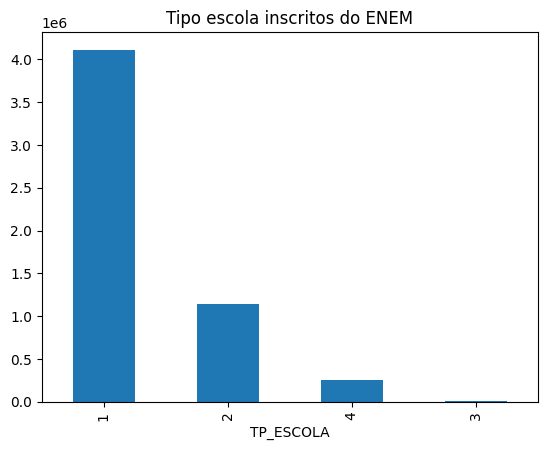

In [124]:
df.TP_ESCOLA.value_counts().plot(kind = 'bar')
plt.title('Tipo escola inscritos do ENEM')

<Axes: xlabel='TP_SEXO'>

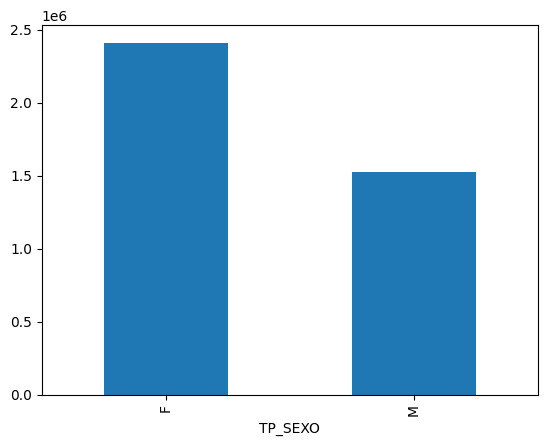

In [30]:
df.TP_SEXO.value_counts().plot(kind = 'bar')

### Melhoranso o plot


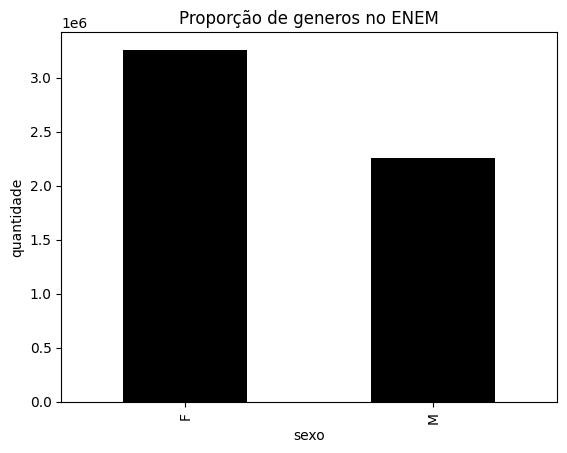

In [129]:
# grafico de barras
df.TP_SEXO.value_counts().plot(kind = 'bar', color = 'black')

# titulo
plt.title('Proporção de generos no ENEM')

# label do eixo x
plt.xlabel('sexo')

# label do eixo y
plt.ylabel('quantidade')

plt.show()


<Axes: ylabel='Municipio'>

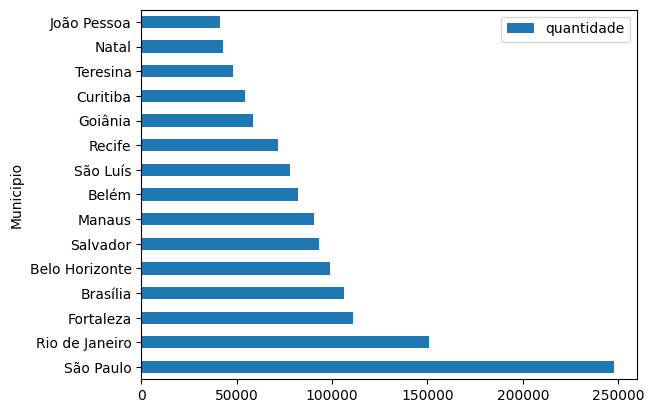

In [131]:
(
    df.NO_MUNICIPIO_PROVA
    .value_counts()
    .reset_index()
    .rename(columns = {'NO_MUNICIPIO_PROVA': 'Municipio','count': 'quantidade'})
    .nlargest(n = 15, columns = 'quantidade')
    .set_index('Municipio')
    .plot(
        kind = 'barh'
    )
)

In [133]:
# outra maneira sem usar parenteses 
df.NO_MUNICIPIO_PROVA\
.value_counts()\
.reset_index()

,NO_MUNICIPIO_PROVA,count
0,São Paulo,247581
1,Rio de Janeiro,150866
2,Fortaleza,111056
3,Brasília,106304
4,Belo Horizonte,98780
...,...,...
1685,Japurá,84
1686,Bonfim,77
1687,Jordão,65
1688,Santa Rosa do Purus,54


<Axes: title={'center': 'Cidades Brasileiras com maior quantidade de inscritos no ENEM'}, xlabel='Quantidade', ylabel='Cidade'>

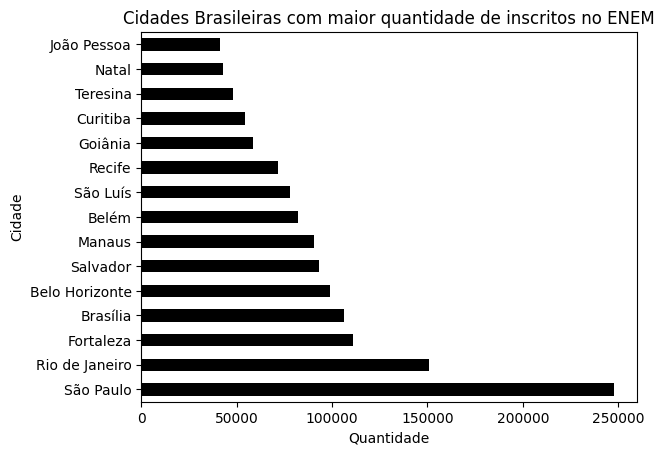

In [135]:
(
    df.NO_MUNICIPIO_PROVA
    .value_counts()
    .reset_index()
    .rename(columns = {'NO_MUNICIPIO_PROVA': 'Cidade','count': 'quantidade'})
    .nlargest(n = 15, columns = 'quantidade')
    .set_index('Cidade')
    .plot(
        kind = 'barh',
        color = 'black',
        legend = False,
        xlabel = 'Quantidade',
        title = 'Cidades Brasileiras com maior quantidade de inscritos no ENEM'
    )
)

<Axes: title={'center': 'Top 15 Municípios by Count'}, ylabel='count'>

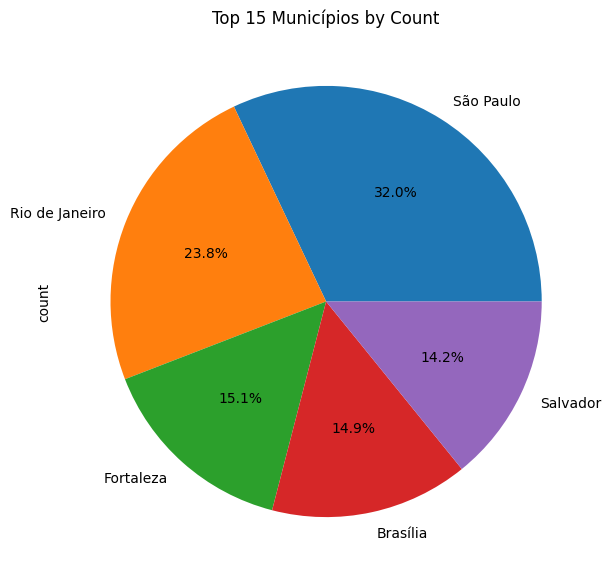

In [34]:
(
    df.NO_MUNICIPIO_PROVA
    .value_counts()
    .nlargest(5)
    .plot(
        kind = 'pie',
        autopct='%1.1f%%',  # Show percentages
        figsize=(10, 7),  # Adjust figure size if needed
        title='Top 15 Municípios by Count'
    )
)

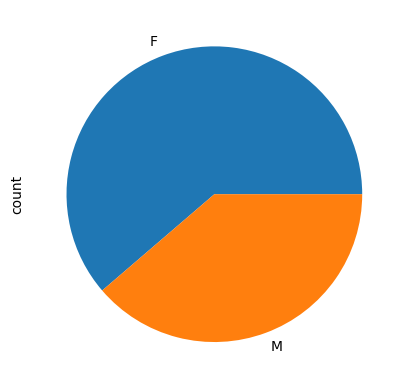

In [36]:
df.TP_SEXO.value_counts().plot(kind = 'pie');

<Axes: ylabel='count'>

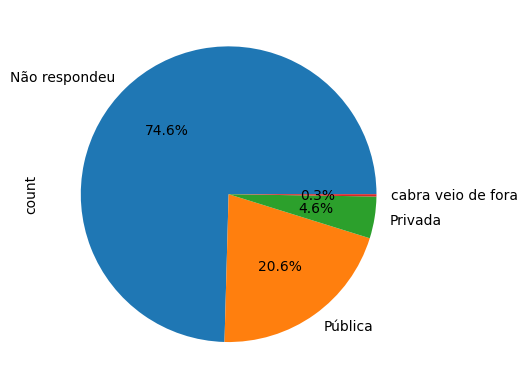

In [141]:
(
    df.TP_ESCOLA.map({1:'Não respondeu', 2: 'Pública', 4:'Privada', 3:'cabra veio de fora'})
    .value_counts()
    .plot(kind = 'pie',
          legend = False,
          autopct = '%1.1f%%'
         )
)

# comando map é idealpara tratar colunas 


grafico de dispersão


<Axes: xlabel='NU_NOTA_MT', ylabel='NU_NOTA_CH'>

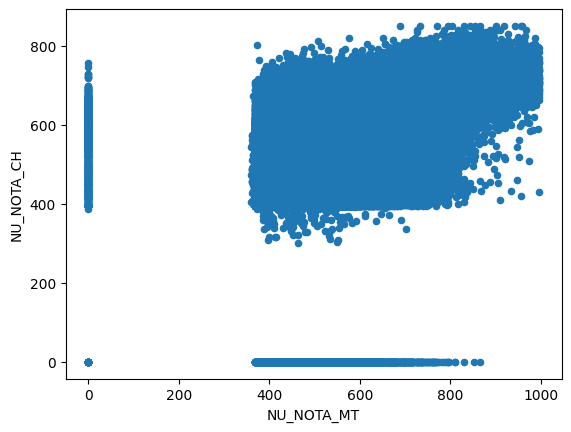

In [144]:
df.plot(kind = 'scatter', x='NU_NOTA_MT', y='NU_NOTA_CH')

HISTOGRAMA

<Axes: ylabel='Frequency'>

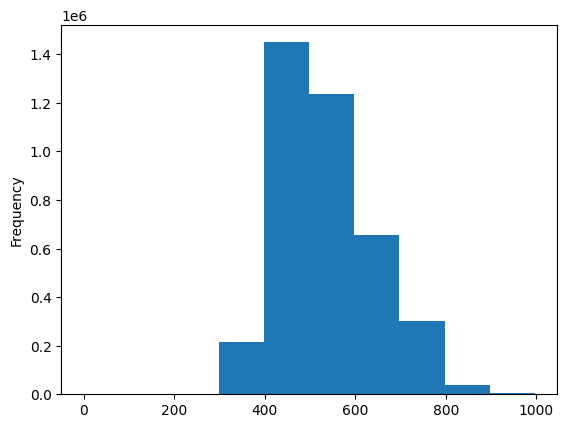

In [147]:
df.NU_NOTA_MT.plot(kind = 'hist')

BOXPLOT

<Axes: >

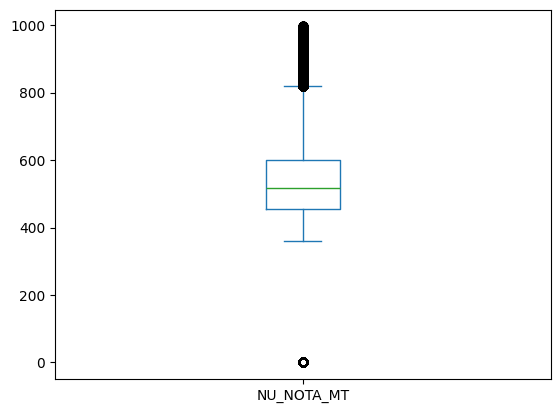

In [154]:
df.NU_NOTA_MT.plot(kind = 'box')

Aplicando a um subset

<Axes: >

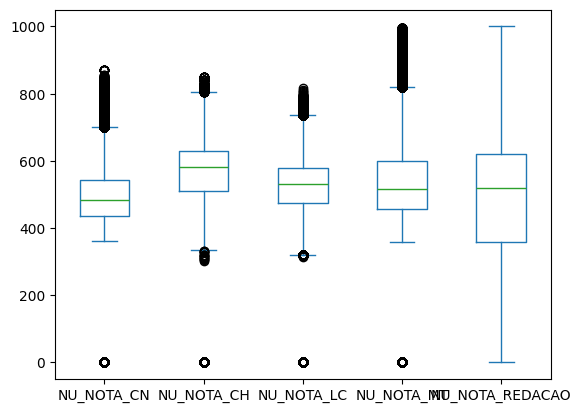

In [217]:
df[provas].plot(kind = 'box')

KDE (densidade)

(0.0, 1000.0)

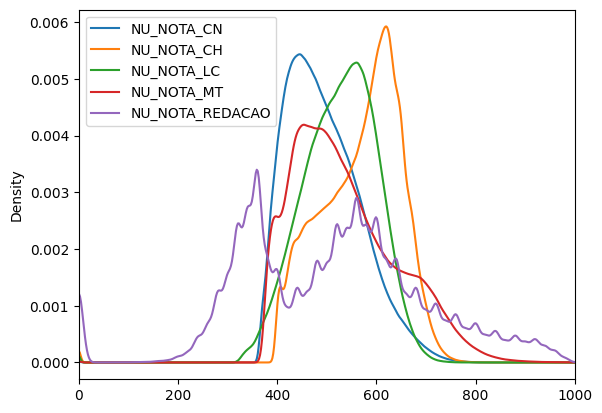

In [220]:
df[provas].plot(kind = 'kde').set_xlim(0, 1000)

<Axes: title={'center': 'Nota media em Matematica por municipio'}, xlabel='Municipio', ylabel='Media em Matematica'>

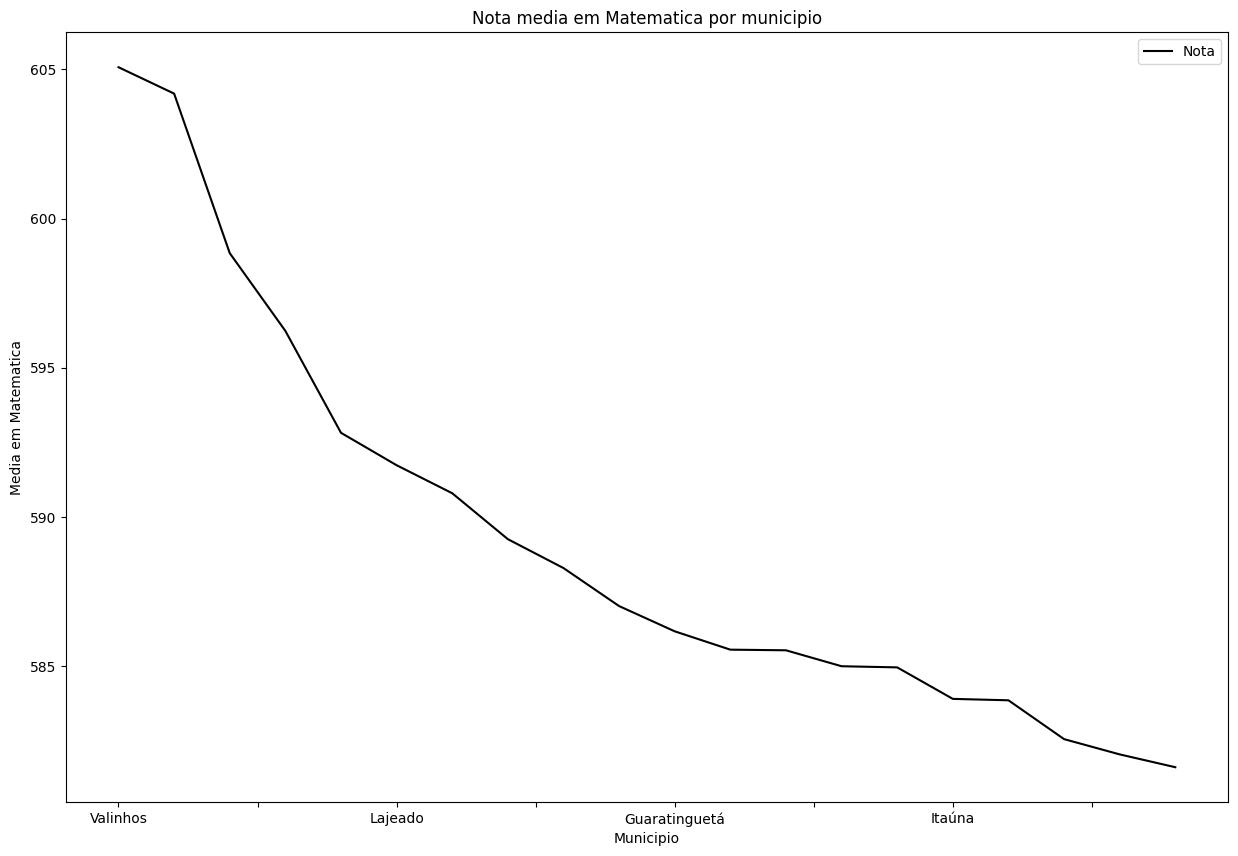

In [6]:
(
    df
    .groupby(by = ['NO_MUNICIPIO_PROVA'])
    .mean('NU_NOTA_MT')
    .reset_index()
    .rename(columns = {'NU_NOTA_MT':'Nota', 'NO_MUNICIPIO_PROVA' : 'Municipio'})
    .nlargest(n = 20, columns = 'Nota')
    .plot(
        x       = 'Municipio',
        y       = 'Nota',
        figsize = (15,10),
        color   = 'k',
        ylabel  = 'Media em Matematica',
        title   = 'Nota media em Matematica por municipio'

    )
)

ORDENAÇÃO
em alguns casos precisamos orddenar os dados por alguma coluna ou conjuto de colunas. No pandas podemos utilizar a função ```.sort_values()```

In [71]:
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']
lugarProva = ['NO_MUNICIPIO_PROVA']

In [73]:
df_subset = df[idCandidato+provas+lugarProva].sample(n = 20, random_state = 9999)

In [75]:
# ordena o dataset em ordem decrescente 
# nesse caso ordenou pela nota de matematica 

df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
2722246,180010337564,684.6,695.2,600.8,796.2,840.0,Porto Velho
3882660,180011726409,588.4,624.1,574.9,700.3,660.0,Barretos
454242,180007711215,522.9,597.9,541.8,683.1,620.0,Fortaleza
2654919,180010257230,548.4,625.5,542.1,660.7,960.0,Serra
3837232,180011670858,441.8,626.2,596.1,566.3,720.0,Rio de Janeiro
2239260,180009760629,423.6,605.0,535.5,551.8,640.0,Uauá
1167496,180008522918,524.9,616.8,539.8,531.6,880.0,Jundiaí
4891601,180013030723,566.6,640.3,538.0,529.4,620.0,São Leopoldo
333782,180007571444,542.6,645.0,627.7,528.5,320.0,Cuiabá
5489766,180013943062,473.2,489.2,466.3,526.0,340.0,Rio Grande


In [77]:
df_subset.sort_values(by = ['NU_NOTA_MT'], na_position = 'first',ascending = False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
5424114,180013832217,NaN,NaN,NaN,NaN,NaN,Altamira
3504238,180011267599,NaN,NaN,NaN,NaN,NaN,Salvador
3379736,180011116662,NaN,NaN,NaN,NaN,NaN,Pitanga
4863330,180012991871,NaN,NaN,NaN,NaN,NaN,Barueri
1138765,180008490297,NaN,NaN,NaN,NaN,NaN,Brejinho de Nazaré
2722246,180010337564,684.6,695.2,600.8,796.2,840.0,Porto Velho
3882660,180011726409,588.4,624.1,574.9,700.3,660.0,Barretos
454242,180007711215,522.9,597.9,541.8,683.1,620.0,Fortaleza
2654919,180010257230,548.4,625.5,542.1,660.7,960.0,Serra
3837232,180011670858,441.8,626.2,596.1,566.3,720.0,Rio de Janeiro


In [81]:
df_subset.sort_values(by = ['NU_NOTA_MT','NU_NOTA_CN'], na_position = 'first',ascending = [False,False])


,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
5424114,180013832217,NaN,NaN,NaN,NaN,NaN,Altamira
3504238,180011267599,NaN,NaN,NaN,NaN,NaN,Salvador
3379736,180011116662,NaN,NaN,NaN,NaN,NaN,Pitanga
4863330,180012991871,NaN,NaN,NaN,NaN,NaN,Barueri
1138765,180008490297,NaN,NaN,NaN,NaN,NaN,Brejinho de Nazaré
2722246,180010337564,684.6,695.2,600.8,796.2,840.0,Porto Velho
3882660,180011726409,588.4,624.1,574.9,700.3,660.0,Barretos
454242,180007711215,522.9,597.9,541.8,683.1,620.0,Fortaleza
2654919,180010257230,548.4,625.5,542.1,660.7,960.0,Serra
3837232,180011670858,441.8,626.2,596.1,566.3,720.0,Rio de Janeiro


In [83]:
type(df.NU_NOTA_MT)

pandas.core.series.Series

In [85]:
df_subset.NU_NOTA_MT.sort_values()

4805761    382.9
3523399    388.2
1508039    428.1
3965431    448.4
4882669    450.5
5489766    526.0
333782     528.5
4891601    529.4
1167496    531.6
2239260    551.8
3837232    566.3
2654919    660.7
454242     683.1
3882660    700.3
2722246    796.2
5424114      NaN
3504238      NaN
3379736      NaN
4863330      NaN
1138765      NaN
Name: NU_NOTA_MT, dtype: float64

In [87]:
df_subset.NU_NOTA_MT.sort_values(ascending = True, na_position = 'first')

5424114      NaN
3504238      NaN
3379736      NaN
4863330      NaN
1138765      NaN
4805761    382.9
3523399    388.2
1508039    428.1
3965431    448.4
4882669    450.5
5489766    526.0
333782     528.5
4891601    529.4
1167496    531.6
2239260    551.8
3837232    566.3
2654919    660.7
454242     683.1
3882660    700.3
2722246    796.2
Name: NU_NOTA_MT, dtype: float64

In [143]:
df_subset = df.query('NO_MUNICIPIO_PROVA == "Taboão da Serra"')[idCandidato+provas+lugarProva]

In [145]:
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False).iloc[:10, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
3383904,180011121652,800.9,721.6,680.6,981.6,840.0,Taboão da Serra
3134794,180010827587,768.4,686.7,628.0,910.6,620.0,Taboão da Serra
103084,180007304677,757.3,702.4,628.9,907.6,800.0,Taboão da Serra
3216461,180010924886,798.5,701.3,688.9,906.5,700.0,Taboão da Serra
3638285,180011428785,681.0,667.5,587.3,900.2,660.0,Taboão da Serra
1596041,180009012937,719.1,737.3,657.8,883.7,840.0,Taboão da Serra
331755,180007569142,714.5,729.1,652.8,881.1,820.0,Taboão da Serra
3369175,180011103962,676.2,709.2,582.4,879.8,780.0,Taboão da Serra
117714,180007321551,734.7,710.9,629.6,863.2,880.0,Taboão da Serra
3499069,180011261292,708.4,700.2,656.9,859.4,800.0,Taboão da Serra


In [147]:
df_subset = df.query('NO_MUNICIPIO_PROVA == "Osasco"')[idCandidato+provas+lugarProva]

In [149]:
df_subset.sort_values(by = ['NU_NOTA_MT'], ascending = False).iloc[:10, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
1134130,180008484994,734.4,715.5,646.4,989.9,960.0,Osasco
4385272,180012341204,739.6,803.1,770.7,967.6,860.0,Osasco
4888029,180013025799,698.3,695.2,664.4,949.3,600.0,Osasco
2660447,180010263771,740.7,726.5,654.2,939.6,720.0,Osasco
3036749,180010712306,780.8,785.2,708.3,932.2,800.0,Osasco
4168487,180012076019,777.8,738.2,697.2,916.9,920.0,Osasco
2583913,180010172720,720.9,713.2,694.7,914.4,740.0,Osasco
1366245,180008751342,792.1,681.1,673.3,903.1,700.0,Osasco
3308189,180011033217,731.2,720.7,656.3,902.3,720.0,Osasco
4510818,180012517520,735.5,714.4,686.4,898.0,800.0,Osasco


In [151]:
# mesma função de jeito diferente 
df_subset.nlargest(n = 10, columns = 'NU_NOTA_MT')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
1134130,180008484994,734.4,715.5,646.4,989.9,960.0,Osasco
4385272,180012341204,739.6,803.1,770.7,967.6,860.0,Osasco
4888029,180013025799,698.3,695.2,664.4,949.3,600.0,Osasco
2660447,180010263771,740.7,726.5,654.2,939.6,720.0,Osasco
3036749,180010712306,780.8,785.2,708.3,932.2,800.0,Osasco
4168487,180012076019,777.8,738.2,697.2,916.9,920.0,Osasco
2583913,180010172720,720.9,713.2,694.7,914.4,740.0,Osasco
1366245,180008751342,792.1,681.1,673.3,903.1,700.0,Osasco
3308189,180011033217,731.2,720.7,656.3,902.3,720.0,Osasco
4510818,180012517520,735.5,714.4,686.4,898.0,800.0,Osasco


In [153]:
df_subset.nsmallest(n = 10, columns = ['NU_NOTA_MT','NU_NOTA_CN'], keep= 'first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
1340526,180008721812,0.0,405.1,537.9,0.0,300.0,Osasco
4730681,180012805571,481.5,595.0,564.0,0.0,360.0,Osasco
3818088,180011647494,559.9,526.0,544.6,369.4,400.0,Osasco
4531304,180012543863,390.3,527.8,558.8,370.2,240.0,Osasco
1082680,180008427112,431.6,630.6,479.6,370.8,560.0,Osasco
560108,180007832778,404.6,569.1,429.2,371.5,480.0,Osasco
2354569,180009898226,398.4,559.8,466.8,371.6,220.0,Osasco
3209917,180010917121,461.6,487.0,487.1,371.8,360.0,Osasco
4496575,180012499108,414.7,488.5,483.2,372.2,460.0,Osasco
594631,180007872850,389.1,564.2,472.4,372.3,420.0,Osasco


In [155]:
df_subset.sort_values( by = ['NU_NOTA_MT','NU_NOTA_CN'], ascending = False).iloc[:10, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
1134130,180008484994,734.4,715.5,646.4,989.9,960.0,Osasco
4385272,180012341204,739.6,803.1,770.7,967.6,860.0,Osasco
4888029,180013025799,698.3,695.2,664.4,949.3,600.0,Osasco
2660447,180010263771,740.7,726.5,654.2,939.6,720.0,Osasco
3036749,180010712306,780.8,785.2,708.3,932.2,800.0,Osasco
4168487,180012076019,777.8,738.2,697.2,916.9,920.0,Osasco
2583913,180010172720,720.9,713.2,694.7,914.4,740.0,Osasco
1366245,180008751342,792.1,681.1,673.3,903.1,700.0,Osasco
3308189,180011033217,731.2,720.7,656.3,902.3,720.0,Osasco
4510818,180012517520,735.5,714.4,686.4,898.0,800.0,Osasco


### index
A indexação do pandas conta as linhas e colunas a partir do zero, mas podemos alterar o indice default do dataframe e ainda oordenar um dataframe de acordo com seu indice, em series temporais alterar indice ddefault poder pode facilitar o trabelho de filtro delas.

```eset_index()```

In [158]:
df_subset.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
51,180007186683,723.3,719.1,622.9,764.5,700.0,Osasco
115,180007186753,417.8,600.1,532.2,488.8,580.0,Osasco
746,180007187473,NaN,622.1,538.9,NaN,520.0,Osasco
781,180007187513,578.5,620.1,569.3,553.1,540.0,Osasco
812,180007187550,581.5,654.7,662.9,568.7,700.0,Osasco


In [160]:
df_subset.set_index('NU_INSCRICAO', inplace = True)

In [162]:
df_subset.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
NU_INSCRICAO,,,,,,
180007186683,723.3,719.1,622.9,764.5,700.0,Osasco
180007186753,417.8,600.1,532.2,488.8,580.0,Osasco
180007187473,NaN,622.1,538.9,NaN,520.0,Osasco
180007187513,578.5,620.1,569.3,553.1,540.0,Osasco
180007187550,581.5,654.7,662.9,568.7,700.0,Osasco


In [166]:
df_subset.sort_index().head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
NU_INSCRICAO,,,,,,
180007186683,723.3,719.1,622.9,764.5,700.0,Osasco
180007186753,417.8,600.1,532.2,488.8,580.0,Osasco
180007187473,NaN,622.1,538.9,NaN,520.0,Osasco
180007187513,578.5,620.1,569.3,553.1,540.0,Osasco
180007187550,581.5,654.7,662.9,568.7,700.0,Osasco


## indexação hierarquica

In [169]:
df_test = df.copy().sample(10)
df_test = df_test.set_index(['NO_MUNICIPIO_PROVA','TP_SEXO'])

In [171]:
df_test

,,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
NO_MUNICIPIO_PROVA,TP_SEXO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cascavel,F,180007983039,2018,12,1.0,3,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4104808,41,PR,1.0,1.0,1.0,1.0,450.0,454.0,457.0,461.0,394.1,623.5,467.9,503.0,BCBBAECECBCEBECCCBCDAEAEBCAEABAEBDEACBDAECDCC,AECCBAEBADCCDCEBCECBEEEEAEAEEEAAECECEBBAAADCA,CABEA99999AEBDEADBBBEAECABBDBABDEDCAAAECACBBBA...,EAEABEAEADBDECDCDACBEABDBBEEDAABBADBCAACDEDDE,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,2.0,0.0,0.0,0.0,0.0,0.0,0.0,D,C,A,B,2,E,A,B,C,B,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
Barra Mansa,F,180009708944,2018,4,0.0,2,1,2,0,2,1.0,0,3306305.0,Volta Redonda,33.0,RJ,2.0,1.0,1.0,3300407,33,RJ,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,425.4,552.1,376.1,387.4,EEDAAEBCDABBABCEBDBADCDEEBCDDABCCDCECABBEDDBC,AEACEDBEABEEEADDAECDEEACEDACCDDECCDDBCDCAEEEE,CDBCA99999CAAACBBBBDABBEBCAEBDAEACEDAAECAEABCC...,BEEECEEDDADAAAAACABAAEEBACDAADDDDDAEBCDCACEEC,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,80.0,80.0,100.0,20.0,400.0,E,D,C,B,4,D,A,B,D,B,A,B,B,A,A,A,A,A,B,A,A,D,B,A,B,B,A
Patos de Minas,F,180008727701,2018,7,0.0,3,1,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3148004,31,MG,1.0,1.0,1.0,1.0,447.0,453.0,458.0,459.0,444.8,580.4,489.5,581.7,ACDCAACBEDDCBEBCACCDCEDBDEBABCAAACCBDBEEAACAB,CDEAAEDECAEBBABBACBDCEBBADBCABEEADEBDAAACECCE,99999DBCACCAABCDDECBBCDDABBDCEDDCBCDBABBEAACEB...,BAEBDCCBDADDADEADDBAABAADCBDCAEEDDECEDDBDECAD,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,40.0,40.0,120.0,40.0,360.0,B,F,A,D,4,E,A,B,C,A,B,B,A,B,A,B,A,A,B,B,B,C,A,B,B,A,A
São José dos Campos,M,180009517168,2018,2,0.0,1,1,2,0,2,1.0,0,3549904.0,São José dos Campos,35.0,SP,2.0,1.0,1.0,3549904,35,SP,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,C,A,B,3,C,A,B,E,A,B,B,B,A,A,A,A,A,B,A,A,B,A,A,A,B,A
Santa Inês,F,180013799729,2018,12,1.0,1,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2109908,21,MA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,B,F,A,3,A,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
Rio de Janeiro,M,180010725917,2018,9,0.0,2,1,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3304557,33,RJ,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,E,C,A,1,F,A,B,A,A,A,B,B,B,B,B,B,A,B,A,A,B,A,A,B,A,B
São Bento do Sul,F,180012771407,2018,2,0.0,1,1,2,0,4,1.0,0,4215802.0,São Bento do Sul,42.0,SC,4.0,1.0,1.0,4215802,42,SC,1.0,1.0,1.0,1.0,450.0,453.0,458.0,461.0,605.1,690.6,664.2,673.5,BCBAEABEEDEBABDAACDBAEDEBBAEDACADCAACAEEDCCBD,ECCDBEBEDAEDBEDAAEDACCACCAADECEECAECAABBEEBBE,BCDEB99999ACBCDEAEABABADABCCDCBDEEEABDACAABDEC...,BBBDAEACCABCEDCCBCADDCCDBDDCAEECBA

In [177]:
df_subset = df_subset.reset_index(drop = False)

In [182]:
df_subset.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NO_MUNICIPIO_PROVA
0,180007186683,723.3,719.1,622.9,764.5,700.0,Osasco
1,180007186753,417.8,600.1,532.2,488.8,580.0,Osasco
2,180007187473,NaN,622.1,538.9,NaN,520.0,Osasco
3,180007187513,578.5,620.1,569.3,553.1,540.0,Osasco
4,180007187550,581.5,654.7,662.9,568.7,700.0,Osasco


- media na nota de matematica por genero 



In [38]:
subset_tp_sexo_m = df.query('TP_SEXO == "M"')

In [39]:
subset_tp_sexo_f = df.query('TP_SEXO == "F"')

###### nota maxima do genero masculino
subset_tp_sexo_m.NU_NOTA_MT.max()

In [42]:
subset_tp_sexo_m.NU_NOTA_LC.max()

820.8

In [44]:
subset_tp_sexo_f.NU_NOTA_LC.max()

820.8

In [46]:

subset_tp_sexo_m.sort_values( by = ['NU_NOTA_MT'], ascending = False).iloc[:10, :][['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH']]

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_CH
2334950,958.6,819.2,701.1,686.4
2682715,958.6,372.8,616.2,554.4
3868759,958.6,736.0,605.9,667.5
3061299,958.6,785.7,657.2,783.5
3868512,958.6,646.3,657.3,672.1
1972814,958.6,777.6,697.5,767.1
2486656,958.6,651.9,656.4,748.0
1173475,958.6,759.8,693.2,674.2
3593473,958.6,388.2,NaN,NaN
2122195,958.6,656.5,639.4,624.6


In [48]:

subset_tp_sexo_f.sort_values( by = ['NU_NOTA_MT'], ascending = False).iloc[:10, :][['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH']]

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_CH
2481690,958.6,645.5,670.0,686.4
2813240,958.6,725.9,622.6,718.6
2973593,958.6,796.2,651.4,703.4
842005,958.6,756.6,655.6,784.1
842422,958.6,843.4,748.0,742.0
27465,958.6,781.5,702.6,720.1
1368663,958.6,811.5,705.8,689.0
2593499,958.6,768.8,652.9,678.1
1118714,958.6,772.5,656.6,731.7
2817664,958.6,795.9,690.8,724.3


Agregação:
`df.column.agg_func()`

In [51]:
# media masculina
subset_tp_sexo_m.NU_NOTA_MT.mean()

560.7985943501175

In [53]:
# media feminina
subset_tp_sexo_f.NU_NOTA_MT.mean()

516.8408085450369

In [57]:
# mediana masculina
subset_tp_sexo_m.NU_NOTA_MT.median()

561.1

In [59]:
# mefiana feminina
subset_tp_sexo_f.NU_NOTA_MT.median()

503.0